# **UnB/ESW/PSPD - Laboratório2 sobre Spark Streaming**

# 1 Inicializações para o laboratório
---

In [ ]:
# Instalando a biblioteca que permite copiar conteúdos do Gdrive compartilhado do professor
!pip install gdown
import gdown

In [ ]:
# Copiando a pasta de laboratório (material do professor) para o contexto do aluno
url = 'https://drive.google.com/drive/folders/1z_l8RO6YYwjLdPrMBtnSNpfzfznJt1ja'
gdown.download_folder(url)

Retrieving folder contents


Processing file 1iCUcvpU6aWAZy2muCrvMwLxkDNVhwlgO confluentinc-kafka-connect-elasticsearch-14.0.10.zip
Processing file 1spWo1lFBOPE8r-i2mqEpIi072lm8rqAo connect.properties
Processing file 1YyzYe69OlCcGLrVvAbwefxJmcle4GVyA elastic.properties


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1iCUcvpU6aWAZy2muCrvMwLxkDNVhwlgO
From (redirected): https://drive.google.com/uc?id=1iCUcvpU6aWAZy2muCrvMwLxkDNVhwlgO&confirm=t&uuid=2dc170d7-43be-41e8-8ff9-dd760182df5b
To: /content/LabElastic/confluentinc-kafka-connect-elasticsearch-14.0.10.zip
100%|██████████| 41.0M/41.0M [00:00<00:00, 93.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1spWo1lFBOPE8r-i2mqEpIi072lm8rqAo
To: /content/LabElastic/connect.properties
100%|██████████| 571/571 [00:00<00:00, 1.88MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YyzYe69OlCcGLrVvAbwefxJmcle4GVyA
To: /content/LabElastic/elastic.properties
100%|██████████| 425/425 [00:00<00:00, 1.87MB/s]
Download completed


['/content/LabElastic/confluentinc-kafka-connect-elasticsearch-14.0.10.zip',
 '/content/LabElastic/connect.properties',
 '/content/LabElastic/elastic.properties']

#2 Instalando o Spark - versão cluster
---

In [ ]:
# Definindo as variáveis de ambiente do Spark (e do Hadoop?)
import os
# Variáveis gerais
os.environ['JAVA_HOME']="/usr/lib/jvm/java-11-openjdk-amd64" # readlink -f /usr/bin/javac
os.environ['BASHRC_PATH']= "/root/.bashrc"
# Variáveis específicas do Spark
os.environ['SPARK_INSTALL_DIR']="/content"
os.environ['SPARK_HOME']="/content/spark"
# Seu PYSPARK_SUBMIT_ARGS atual + o conector do Elasticsearch (versão 8.15.0)
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-streaming-kafka-0-10_2.12:3.5.0,org.apache.spark:spark-sql-kafka-0-10_2.12:3.5.0,org.elasticsearch:elasticsearch-spark-30_2.12:8.15.0 pyspark-shell'
# Adicione: org.elasticsearch:elasticsearch-spark-30_2.12:7.12.0
#os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-streaming-kafka-0-10_2.12:3.5.0,org.apache.spark:spark-sql-kafka-0-10_2.12:3.5.0,org.elasticsearch:elasticsearch-spark-30_2.12:7.12.0 pyspark-shell'

In [ ]:
!java -version

openjdk version "17.0.16" 2025-07-15
OpenJDK Runtime Environment (build 17.0.16+8-Ubuntu-0ubuntu122.04.1)
OpenJDK 64-Bit Server VM (build 17.0.16+8-Ubuntu-0ubuntu122.04.1, mixed mode, sharing)


In [ ]:
# Copiando os fonte do hadoop para a pasta $SPARK_INSTALL_DIR
!wget https://archive.apache.org/dist/spark/spark-3.5.6/spark-3.5.6-bin-hadoop3.tgz -P $SPARK_INSTALL_DIR

--2025-11-15 20:41:04--  https://archive.apache.org/dist/spark/spark-3.5.6/spark-3.5.6-bin-hadoop3.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400923510 (382M) [application/x-gzip]
Saving to: ‘/content/spark-3.5.6-bin-hadoop3.tgz’

spark-3.5.6-bin-had 100%[===================>] 382.35M  2.50MB/s    in 69s     

2025-11-15 20:42:14 (5.57 MB/s) - ‘/content/spark-3.5.6-bin-hadoop3.tgz’ saved [400923510/400923510]



In [ ]:
# Descompactando os arquivos do hadoop na pasta $SPARK_INSTALL_DIR
!tar -xvzf $SPARK_INSTALL_DIR/spark-3.5.6-bin-hadoop3.tgz -C $SPARK_INSTALL_DIR
!mv $SPARK_INSTALL_DIR/spark-3.5.6-bin-hadoop3 $SPARK_INSTALL_DIR/spark
!rm $SPARK_INSTALL_DIR/spark-3.5.6-bin-hadoop3.tgz

spark-3.5.6-bin-hadoop3/
spark-3.5.6-bin-hadoop3/examples/
spark-3.5.6-bin-hadoop3/examples/jars/
spark-3.5.6-bin-hadoop3/examples/jars/spark-examples_2.12-3.5.6.jar
spark-3.5.6-bin-hadoop3/examples/jars/scopt_2.12-3.7.1.jar
spark-3.5.6-bin-hadoop3/examples/src/
spark-3.5.6-bin-hadoop3/examples/src/main/
spark-3.5.6-bin-hadoop3/examples/src/main/java/
spark-3.5.6-bin-hadoop3/examples/src/main/java/org/
spark-3.5.6-bin-hadoop3/examples/src/main/java/org/apache/
spark-3.5.6-bin-hadoop3/examples/src/main/java/org/apache/spark/
spark-3.5.6-bin-hadoop3/examples/src/main/java/org/apache/spark/examples/
spark-3.5.6-bin-hadoop3/examples/src/main/java/org/apache/spark/examples/mllib/
spark-3.5.6-bin-hadoop3/examples/src/main/java/org/apache/spark/examples/mllib/JavaDecisionTreeClassificationExample.java
spark-3.5.6-bin-hadoop3/examples/src/main/java/org/apache/spark/examples/mllib/JavaAssociationRulesExample.java
spark-3.5.6-bin-hadoop3/examples/src/main/java/org/apache/spark/examples/mllib/Jav

**Ativando o servidor Spark**

In [ ]:
# Iniciando os processos NameNode e DataNode, daemons do HDFS
!$SPARK_HOME/sbin/start-master.sh --host localhost --port 7077

org.apache.spark.deploy.master.Master running as process 11664.  Stop it first.


In [ ]:
# Iniciando os processos relativos ao gerenciador de recursos YARN
!$SPARK_HOME/sbin/start-worker.sh spark://localhost:7077

org.apache.spark.deploy.worker.Worker running as process 11736.  Stop it first.


In [ ]:
!pip install pyspark
#!$SPARK_HOME/bin/pyspark --master spark://localhost:7077

# 3. Instalando o Kafka

In [ ]:
# Instalando o kafka python
!pip install kafka-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 16.1 MB/s eta 0:00:00


In [ ]:
# Fazendo os imports de Producer e Consumer do Kafka
from kafka import KafkaProducer
from kafka import KafkaConsumer

In [ ]:
# Fazendo download do binário do kafka
!curl -sSOL https://dlcdn.apache.org/kafka/3.8.0/kafka_2.13-3.8.0.tgz

In [ ]:
# Descompactando o kafka e criando um link para a pasta do kafka
!tar xvfz kafka_2.13-3.8.0.tgz
!ln -s kafka_2.13-3.8.0 kafka
!rm kafka_2.13-3.8.0.tgz

kafka_2.13-3.8.0/
kafka_2.13-3.8.0/LICENSE
kafka_2.13-3.8.0/NOTICE
kafka_2.13-3.8.0/bin/
kafka_2.13-3.8.0/bin/connect-distributed.sh
kafka_2.13-3.8.0/bin/connect-mirror-maker.sh
kafka_2.13-3.8.0/bin/connect-plugin-path.sh
kafka_2.13-3.8.0/bin/connect-standalone.sh
kafka_2.13-3.8.0/bin/kafka-acls.sh
kafka_2.13-3.8.0/bin/kafka-broker-api-versions.sh
kafka_2.13-3.8.0/bin/kafka-client-metrics.sh
kafka_2.13-3.8.0/bin/kafka-cluster.sh
kafka_2.13-3.8.0/bin/kafka-configs.sh
kafka_2.13-3.8.0/bin/kafka-console-consumer.sh
kafka_2.13-3.8.0/bin/kafka-console-producer.sh
kafka_2.13-3.8.0/bin/kafka-consumer-groups.sh
kafka_2.13-3.8.0/bin/kafka-consumer-perf-test.sh
kafka_2.13-3.8.0/bin/kafka-delegation-tokens.sh
kafka_2.13-3.8.0/bin/kafka-delete-records.sh
kafka_2.13-3.8.0/bin/kafka-dump-log.sh
kafka_2.13-3.8.0/bin/kafka-e2e-latency.sh
kafka_2.13-3.8.0/bin/kafka-features.sh
kafka_2.13-3.8.0/bin/kafka-get-offsets.sh
kafka_2.13-3.8.0/bin/kafka-jmx.sh
kafka_2.13-3.8.0/bin/kafka-leader-election.sh
kafka

In [ ]:
# Ativando os daemons do kafka...
!./kafka/bin/zookeeper-server-start.sh -daemon ./kafka/config/zookeeper.properties
!./kafka/bin/kafka-server-start.sh -daemon ./kafka/config/server.properties

In [ ]:
# Check if Kafka is running by listing topics
!./kafka/bin/kafka-topics.sh --list --bootstrap-server localhost:9092

/content/kafka/bin/kafka-run-class.sh: line 353: /usr/lib/jvm/java-11-openjdk-amd64/bin/java: No such file or directory


In [ ]:
!jps

2077 Jps


In [ ]:
#Criando canais kafka
!./kafka/bin/kafka-topics.sh --create --bootstrap-server localhost:9092 --replication-factor 1 --partitions 1 --topic canalinput
!./kafka/bin/kafka-topics.sh --create --bootstrap-server localhost:9092 --replication-factor 1 --partitions 1 --topic canaloutput

/content/kafka/bin/kafka-run-class.sh: line 353: /usr/lib/jvm/java-11-openjdk-amd64/bin/java: No such file or directory
/content/kafka/bin/kafka-run-class.sh: line 353: /usr/lib/jvm/java-11-openjdk-amd64/bin/java: No such file or directory


# 4. Contabilizando as palavras do kafka no streaming

1.   Item da lista
2.   Item da lista



In [ ]:
from pyspark.sql import SparkSession

In [ ]:
SPARK_MASTER="spark://localhost:7077"
APP_NAME="Lab Kafka Niajus"

KAFKA_HOST="localhost:9092"
KAFKA_TOPIC_IN="canalinput"
KAFKA_TOPIC_OUT="canaloutput"

INTERVAL = "5 seconds"

In [ ]:
spark = SparkSession.builder.master(SPARK_MASTER).appName(APP_NAME).getOrCreate()

In [ ]:
NGROK_HOST = "9af2b399ddd8.ngrok-free.app"
ES_INDEX = "spark_word_counts"

def write_to_es(df):
    """Escreve cada micro-batch no Elasticsearch através do túnel ngrok."""
    # O ngrok tunnel para a porta 9200 é tipicamente na porta 443 se for HTTPS
    (df.write.format("org.elasticsearch.spark.sql")
        .option("es.resource", f"{ES_INDEX}/_doc")
        .option("es.nodes", NGROK_HOST)
        .option("es.port", "443") # Use a porta padrão HTTPS, pois ngrok usa HTTPS por padrão
        .option("es.net.ssl", "true") # Habilita SSL para a conexão ngrok HTTPS
        .option("es.mapping.id", "word")
        .option("es.write.operation", "upsert")
        .mode("append")
        .save())

In [ ]:
messages = spark.readStream.format("kafka").option("kafka.bootstrap.servers", KAFKA_HOST) \
                .option ("subscribe", KAFKA_TOPIC_IN) \
                .option ("includeTimestamp", "true").load()

In [ ]:
from pyspark.sql.functions import explode, split, col, upper, window, to_json, struct, lit

In [ ]:
# --- 1. Instalação da Biblioteca Hugging Face Datasets ---
# Se ainda não estiver instalado no seu ambiente:
!pip install datasets

# Producer do Kafka para mandar os textos do ImDB que são puxados de datasets do Huggingface

In [ ]:
# --- 2. Imports e Configuração do Kafka ---
from kafka import KafkaProducer
import time
from datasets import load_dataset
import random # Para selecionar um split aleatório ou embaralhar

# Configuração do Producer
producer = KafkaProducer(bootstrap_servers=['localhost:9092'],
                         value_serializer=lambda v: v.encode('utf-8'))

# Função para enviar a mensagem
def send_message(topic, message):
    # Envia apenas o início da mensagem para não sobrecarregar o log
    display_message = message[:100].replace('\n', ' ') + '...'

    producer.send(topic, message)
    producer.flush()
    print(f"Sent: '{display_message}' to topic '{topic}'")

print("Starting Kafka producer for 'canalinput'...")

# --- 3. Carregamento e Processamento do Dataset ---

# Carrega o dataset IMDb do Hugging Face.
# O dataset tem 3 splits: 'train', 'test' e 'unsupervised'. Usaremos o 'train'.
print("Loading IMDb dataset from Hugging Face...")
try:
    imdb_dataset = load_dataset("imdb", split="train")

    # Define o número de reviews que você quer enviar (ex: 10 mensagens)
    NUM_MESSAGES_TO_SEND = 200

    # Seleciona as primeiras N mensagens para evitar carregar o dataset inteiro
    messages_to_send = imdb_dataset.select(range(NUM_MESSAGES_TO_SEND))

    # --- 4. Envio das Mensagens ---
    print(f"Starting to send {NUM_MESSAGES_TO_SEND} movie reviews to 'canalinput'...")

    # Itera sobre os exemplos e envia o campo 'text'
    for review in messages_to_send:
        # O campo 'text' contém a review do filme
        msg = review['text']
        send_message('canalinput', msg)
        time.sleep(0.1) # Intervalo de 1 segundo entre mensagens para simular streaming

    print("Finished sending messages.")

except Exception as e:
    print(f"An error occurred while loading or sending the dataset: {e}")
    print("Please ensure you have an active internet connection and the 'datasets' library is installed.")

# Fecha o producer após o uso
producer.close()

Starting Kafka producer for 'canalinput'...
Loading IMDb dataset from Hugging Face...
Starting to send 200 movie reviews to 'canalinput'...
Sent: 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it w...' to topic 'canalinput'
Sent: '"I Am Curious: Yellow" is a risible and pretentious steaming pile. It doesn't matter what one's poli...' to topic 'canalinput'
Sent: 'If only to avoid making this type of film in the future. This film is interesting as an experiment b...' to topic 'canalinput'
Sent: 'This film was probably inspired by Godard's Masculin, féminin and I urge you to see that film instea...' to topic 'canalinput'
Sent: 'Oh, brother...after hearing about this ridiculous film for umpteen years all I can think of is that ...' to topic 'canalinput'
Sent: 'I would put this at the top of my list of films in the category of unwatchable trash! There are film...' to topic 'canalinput'
Sent: 'Whoever wrote the screenplay for this movie obvio

In [ ]:
words = messages \
            .select(
                explode(split(col("value"), "\s+")).alias("word"),
                messages.timestamp
        ).select (
            upper(col("word")).alias("word"),
            col("timestamp")
        )

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-911942699.py:3: SyntaxWarning: invalid escape sequence '\s'
  explode(split(col("value"), "\s+")).alias("word"),


In [ ]:
wordCounts = words.withWatermark("timestamp", INTERVAL) \
                .groupBy(
                    window(words.timestamp, INTERVAL, INTERVAL), "word"
                ).count()

In [ ]:
wordCountsJson = wordCounts.select(
    lit("1").alias("key"),
    to_json(struct("word", "count", 'window.start')).alias("value"))

In [ ]:
wck = wordCountsJson.writeStream.outputMode("complete").format("kafka").option("kafka.bootstrap.servers", KAFKA_HOST) \
        .option("topic", KAFKA_TOPIC_OUT).option("checkpointLocation", "/tmp/spark-kafka") \
        .trigger(processingTime=INTERVAL).start()

# Consome as palavras e printa a palavra com seu respectivo count

In [ ]:
from kafka import KafkaConsumer
import json

# Configure the Kafka Consumer
consumer = KafkaConsumer(
    'canaloutput',
    bootstrap_servers=['localhost:9092'],
    auto_offset_reset='earliest',  # Start consuming from the beginning of the topic if no offset is committed
    enable_auto_commit=True,       # Commit offsets automatically
    group_id='my-word-count-group',# Consumer group ID
    value_deserializer=lambda x: json.loads(x.decode('utf-8')) # Deserialize JSON messages
)

print("Starting Kafka consumer for 'canaloutput'...")

# Consume messages
for message in consumer:
    print(f"Received message: Palavra '{message.value['word']}' -> Count: {message.value['count']}")


In [ ]:
!pip install matplotlib

--- Atualizando Gráfico (Total de 26350 mensagens processadas) ---


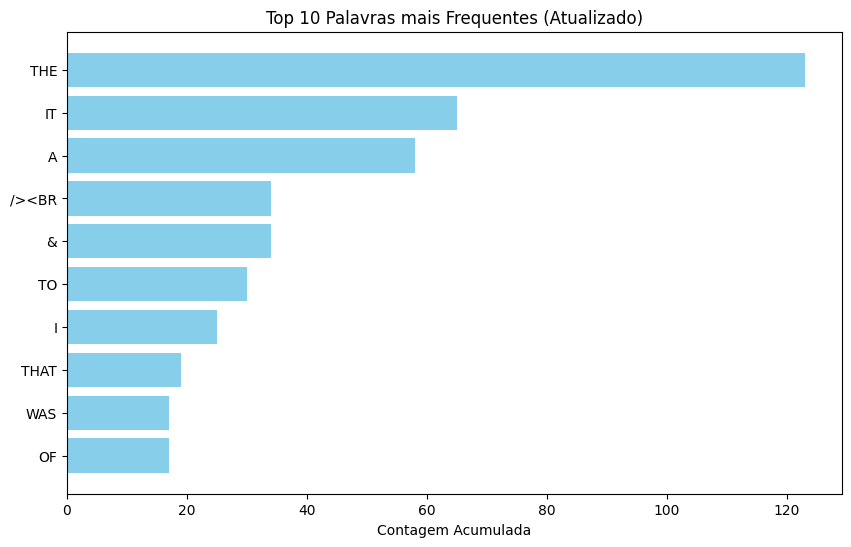


Consumer stopped by user. Generating final plot...


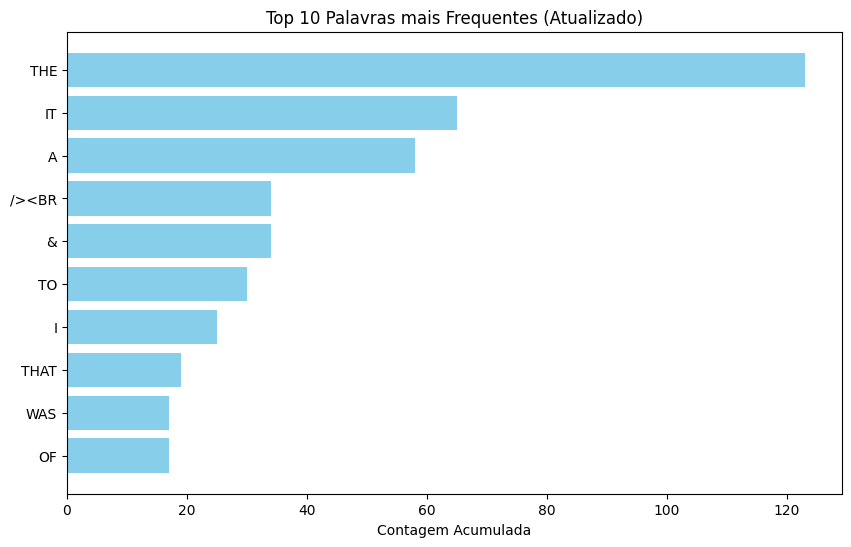

In [ ]:
from kafka import KafkaConsumer
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import time
from IPython.display import clear_output # Para limpar o output em ambientes como Jupyter/Colab

# Dicionário para armazenar o estado das contagens de palavras
word_counts_accumulator = defaultdict(int)

# Contador para controlar a frequência de atualização do gráfico
message_counter = 0
UPDATE_FREQUENCY = 200 # Atualizar o gráfico a cada 50 novas mensagens

# Configure o Kafka Consumer
consumer = KafkaConsumer(
    'canaloutput',
    bootstrap_servers=['localhost:9092'],
    auto_offset_reset='earliest',
    enable_auto_commit=True,
    group_id='my-word-count-group',
    value_deserializer=lambda x: json.loads(x.decode('utf-8'))
)

def plot_word_counts(counts_dict, top_n=10):
    """Gera e exibe o gráfico de barras das palavras mais frequentes."""

    # Ordena as palavras pela contagem (do maior para o menor)
    sorted_words = sorted(counts_dict.items(), key=lambda item: item[1], reverse=True)

    # Seleciona as N palavras mais frequentes
    top_words = sorted_words[:top_n]

    # Prepara os dados para o Matplotlib
    words = [item[0] for item in top_words]
    counts = [item[1] for item in top_words]

    # Cria o gráfico
    plt.figure(figsize=(10, 6))
    plt.barh(words[::-1], counts[::-1], color='skyblue') # barh para barras horizontais
    plt.xlabel('Contagem Acumulada')
    plt.title(f'Top {top_n} Palavras mais Frequentes (Atualizado)')

    # Exibir o gráfico
    plt.show()

print("Starting Kafka consumer for 'canaloutput' and initializing word count graph...")

# Consome mensagens
try:
    for message in consumer:

        # 1. Processa a mensagem
        data = message.value
        word = data['word']
        count = data['count']

        # O Spark Structured Streaming no modo "update" envia o NOVO total da contagem
        # Apenas atualizamos o dicionário com o valor mais recente
        word_counts_accumulator[word] = count

        # Imprime a atualização para o console (opcional)
        print(f"Received update: Palavra '{word}' -> Count: {count}")

        # 2. Atualiza o contador e gera o gráfico
        message_counter += 1

        if message_counter % UPDATE_FREQUENCY == 0:
            clear_output(wait=True) # Limpa o output anterior (útil no Colab/Jupyter)
            print(f"--- Atualizando Gráfico (Total de {message_counter} mensagens processadas) ---")
            plot_word_counts(word_counts_accumulator)
            time.sleep(1) # Pequena pausa para visualização

except KeyboardInterrupt:
    print("\nConsumer stopped by user. Generating final plot...")
    plot_word_counts(word_counts_accumulator)

except Exception as e:
    print(f"\nAn error occurred: {e}")

finally:
    consumer.close()

# Exercício

A. Perceba que o resultado do canal de saída (canaloutput) não é uma contabilização das palavras de entrada... Altere o notebook para que o canal de saída contemple valores acumulados das palavras (contador de palavras).

B. Crie um outro notebook, similar ao notebook, porém promovendo as seguintes alterações:
<ol>
  <li> Conectar uma nuvem de palavras (em forma gráfica) no canal de saída  <p>

  <li> Conectar uma fonte alternativa de dados, preferencialmente online, ao canal de entrada. Por exemplo, ler dados de uma rede social ou de dois arquivos simultâneos (enfim, gerar alguma variação do notebook apresentado <p>
</ol>
As respostas desse experimento exercício devem ser postadas no Moodle em data especificada pelo professor.

# Implementaçãop Kibana e ElasticSearch

- Problemas no modo local
- Conectar os dois (Kibana e ElasticSeach)
- Só consegui rodar no Google Colab
